# Solar System major bodies

In [202]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px 

sns.set(font_scale = 0.7)

In [203]:
data = pd.read_csv('sol_data.csv')
data.head()

,eName,isPlanet,semimajorAxis,perihelion,aphelion,eccentricity,inclination,density,gravity,escape,...,orbits,bondAlbido,geomAlbido,RV_abs,p_transit,transit_visibility,transit_depth,massj,semimajorAxis_AU,grav_int
0,Moon,False,384400,363300,405500,0.0549,5.145,3.344,1.6200,2380.000,...,Earth,NaN,NaN,NaN,1.811589,326.086108,2.245860e-09,3.868421e-05,0.002570,6.606324e+25
1,Phobos,False,9376,9234,9518,0.0151,1.075,1.900,0.0057,11.390,...,Mars,NaN,NaN,NaN,74.272078,13368.973976,2.245860e-09,5.578947e-12,0.000063,1.601437e+22
2,Deimos,False,23458,23456,23471,0.0002,1.075,1.750,0.0030,5.556,...,Mars,NaN,NaN,NaN,29.686035,5343.486231,2.245860e-09,1.263158e-12,0.000157,5.792534e+20
3,Io,False,421800,0,0,0.0040,0.036,3.530,1.7900,0.000,...,Jupiter,NaN,NaN,NaN,1.655200,297.936060,6.842474e-06,4.700000e-05,0.002820,6.666188e+25
4,Europa,False,671100,0,0,0.0090,0.466,3.010,1.3100,0.000,...,Jupiter,NaN,NaN,NaN,1.039939,187.188949,5.023997e-06,2.526316e-05,0.004486,1.415487e+25


The perihelion and aphelion values for pluto, Uranus and Neptune are incorrect in the dataset

https://nssdc.gsfc.nasa.gov/planetary/factsheet/index.html

In [204]:
# Correcting the dataset

data.iloc[208,3] = 4434987000
data.iloc[208,4] = 7304326000
data.iloc[199,3] = 2732700000
data.iloc[199,4] = 3001400000
data.iloc[219,3] = 4452940833
data.iloc[219,4] = 4553946490

## Planets

In [205]:
# Don't dwarf planets
planets = data[data.eName.isin(['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune'])]
planets

,eName,isPlanet,semimajorAxis,perihelion,aphelion,eccentricity,inclination,density,gravity,escape,...,orbits,bondAlbido,geomAlbido,RV_abs,p_transit,transit_visibility,transit_depth,massj,semimajorAxis_AU,grav_int
199,Uranus,True,2870658186,2732700000,3001400000,0.0457,0.772,1.2700,8.87,21380.0,...,NaN,0.300,0.488,0.296744,0.000251,0.045253,0.001327,0.045684,19.189165,1.398930e+21
219,Neptune,True,4498396441,4452940833,4553946490,0.0113,1.769,1.6380,11.15,23560.0,...,NaN,0.290,0.442,0.278582,0.000160,0.028849,0.001250,0.053684,30.069923,6.694590e+20
238,Jupiter,True,778340821,740379835,816620000,0.0489,1.304,1.3262,24.79,60200.0,...,NaN,0.503,0.538,12.473518,0.000984,0.177205,0.010080,1.000000,5.202887,4.165367e+23
239,Mars,True,227943824,206700000,249200000,0.0935,1.850,3.9341,3.71,5030.0,...,NaN,0.250,0.170,0.007785,0.003070,0.552556,0.000024,0.000338,1.523710,1.641038e+21
240,Mercury,True,57909227,46001200,69816900,0.2056,7.000,5.4291,3.70,4250.0,...,NaN,0.088,0.142,0.007939,0.012067,2.172031,0.000012,0.000174,0.387099,1.306946e+22
241,Saturn,True,1426666422,1349823615,1503509229,0.0565,2.485,0.6871,10.44,36090.0,...,NaN,0.342,0.499,2.752346,0.000529,0.095203,0.006993,0.298947,9.536676,3.706318e+22
243,Earth,True,149598262,147095000,152100000,0.0167,0.000,5.5136,9.80,11190.0,...,NaN,0.306,0.367,0.089355,0.004697,0.845520,0.000084,0.003142,1.000003,3.542913e+22
244,Venus,True,108208475,107477000,108939000,0.0067,3.390,5.2430,8.87,10360.0,...,NaN,0.760,0.689,0.085703,0.006491,1.168401,0.000076,0.002563,0.723329,5.523898e+22


### Mean orbital distance  - Distancia entre el sol y el planeta (media) 

- Semi-major axis: One half of the major axis of the elliptical orbit; also the mean distance from the Sun.
- perihelion: An orbit’s closest point to the Sun.
- aphelion: An orbit’s farthest point to the Sun.


In [206]:
planets = planets.sort_values('semimajorAxis',ascending=True)
planets

,eName,isPlanet,semimajorAxis,perihelion,aphelion,eccentricity,inclination,density,gravity,escape,...,orbits,bondAlbido,geomAlbido,RV_abs,p_transit,transit_visibility,transit_depth,massj,semimajorAxis_AU,grav_int
240,Mercury,True,57909227,46001200,69816900,0.2056,7.000,5.4291,3.70,4250.0,...,NaN,0.088,0.142,0.007939,0.012067,2.172031,0.000012,0.000174,0.387099,1.306946e+22
244,Venus,True,108208475,107477000,108939000,0.0067,3.390,5.2430,8.87,10360.0,...,NaN,0.760,0.689,0.085703,0.006491,1.168401,0.000076,0.002563,0.723329,5.523898e+22
243,Earth,True,149598262,147095000,152100000,0.0167,0.000,5.5136,9.80,11190.0,...,NaN,0.306,0.367,0.089355,0.004697,0.845520,0.000084,0.003142,1.000003,3.542913e+22
239,Mars,True,227943824,206700000,249200000,0.0935,1.850,3.9341,3.71,5030.0,...,NaN,0.250,0.170,0.007785,0.003070,0.552556,0.000024,0.000338,1.523710,1.641038e+21
238,Jupiter,True,778340821,740379835,816620000,0.0489,1.304,1.3262,24.79,60200.0,...,NaN,0.503,0.538,12.473518,0.000984,0.177205,0.010080,1.000000,5.202887,4.165367e+23
241,Saturn,True,1426666422,1349823615,1503509229,0.0565,2.485,0.6871,10.44,36090.0,...,NaN,0.342,0.499,2.752346,0.000529,0.095203,0.006993,0.298947,9.536676,3.706318e+22
199,Uranus,True,2870658186,2732700000,3001400000,0.0457,0.772,1.2700,8.87,21380.0,...,NaN,0.300,0.488,0.296744,0.000251,0.045253,0.001327,0.045684,19.189165,1.398930e+21
219,Neptune,True,4498396441,4452940833,4553946490,0.0113,1.769,1.6380,11.15,23560.0,...,NaN,0.290,0.442,0.278582,0.000160,0.028849,0.001250,0.053684,30.069923,6.694590e+20


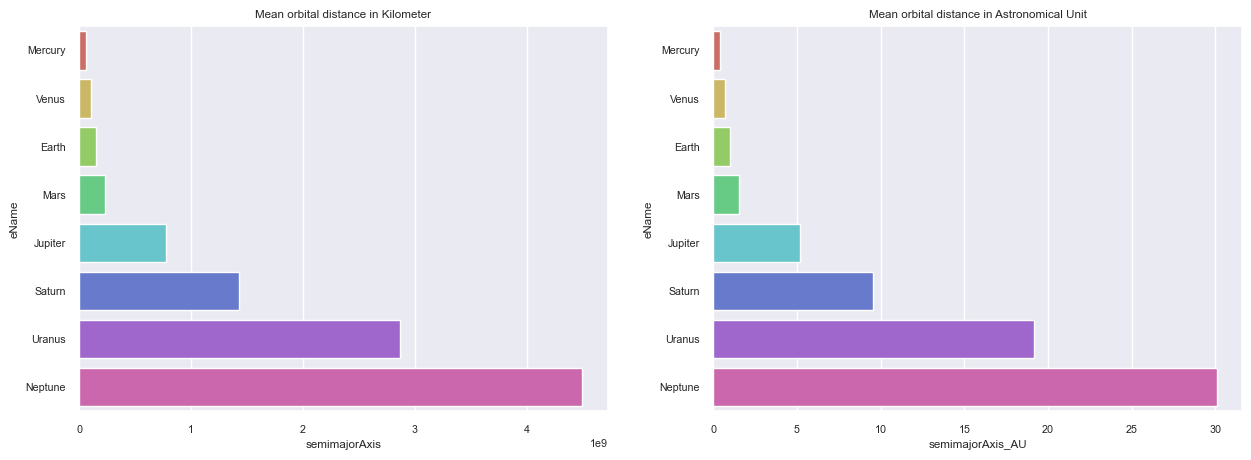

In [207]:
fig, ax = plt.subplots (1, 2, figsize=(15, 5))

ax[0].set_title('Mean orbital distance in Kilometer')
sns.barplot(data=planets, x='semimajorAxis', y='eName', ci="sd", palette="hls", ax = ax[0])

ax[1].set_title('Mean orbital distance in Astronomical Unit')
sns.barplot(data=planets, x='semimajorAxis_AU', y='eName', ci="sd",palette="hls", ax = ax[1])
plt.show()


### Pluto

In [208]:
# planet2: is the group of planets plus Pluto (best known dwarf planet)

pluto = data[data.eName == 'Pluto']
planets2 = pd.concat([planets,pluto])
planets2.sort_values('perihelion',ascending=True)
planets2

,eName,isPlanet,semimajorAxis,perihelion,aphelion,eccentricity,inclination,density,gravity,escape,...,orbits,bondAlbido,geomAlbido,RV_abs,p_transit,transit_visibility,transit_depth,massj,semimajorAxis_AU,grav_int
240,Mercury,True,57909227,46001200,69816900,0.2056,7.000,5.4291,3.70,4250.0,...,NaN,0.088,0.142,0.007939,0.012067,2.172031,0.000012,0.000174,0.387099,1.306946e+22
244,Venus,True,108208475,107477000,108939000,0.0067,3.390,5.2430,8.87,10360.0,...,NaN,0.760,0.689,0.085703,0.006491,1.168401,0.000076,0.002563,0.723329,5.523898e+22
243,Earth,True,149598262,147095000,152100000,0.0167,0.000,5.5136,9.80,11190.0,...,NaN,0.306,0.367,0.089355,0.004697,0.845520,0.000084,0.003142,1.000003,3.542913e+22
239,Mars,True,227943824,206700000,249200000,0.0935,1.850,3.9341,3.71,5030.0,...,NaN,0.250,0.170,0.007785,0.003070,0.552556,0.000024,0.000338,1.523710,1.641038e+21
238,Jupiter,True,778340821,740379835,816620000,0.0489,1.304,1.3262,24.79,60200.0,...,NaN,0.503,0.538,12.473518,0.000984,0.177205,0.010080,1.000000,5.202887,4.165367e+23
241,Saturn,True,1426666422,1349823615,1503509229,0.0565,2.485,0.6871,10.44,36090.0,...,NaN,0.342,0.499,2.752346,0.000529,0.095203,0.006993,0.298947,9.536676,3.706318e+22
199,Uranus,True,2870658186,2732700000,3001400000,0.0457,0.772,1.2700,8.87,21380.0,...,NaN,0.300,0.488,0.296744,0.000251,0.045253,0.001327,0.045684,19.189165,1.398930e+21
219,Neptune,True,4498396441,4452940833,4553946490,0.0113,1.769,1.6380,11.15,23560.0,...,NaN,0.290,0.442,0.278582,0.000160,0.028849,0.001250,0.053684,30.069923,6.694590e+20
208,Pluto,True,5906440628,4434987000,7304326000,0.2488,17.160,1.8900,0.62,1210.0,...,NaN,NaN,0.575,0.000031,0.000118,0.021257,0.000003,0.000007,39.482117,4.949154e+16


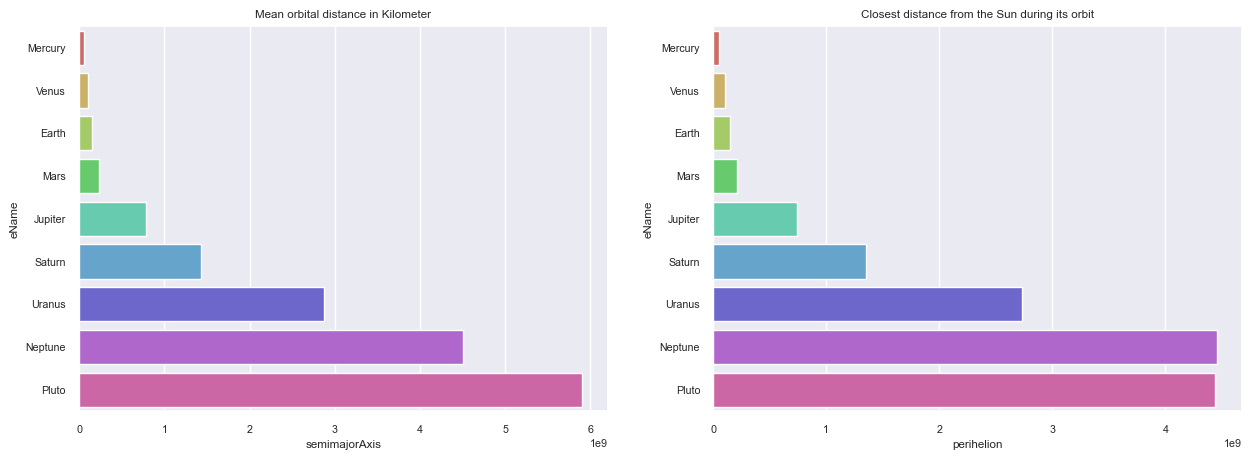

In [209]:
fig, ax = plt.subplots (1, 2, figsize=(15, 5))

ax[0].set_title('Mean orbital distance in Kilometer')
sns.barplot(data=planets2, x='semimajorAxis', y='eName', ci="sd", palette="hls", ax = ax[0])

ax[1].set_title('Closest distance from the Sun during its orbit')
sns.barplot(data=planets2, x='perihelion', y='eName', ci="sd",palette="hls", ax = ax[1])
plt.show()

Pluto's orbit around the Sun is unusual compared to the planets: it's both elliptical and tilted.

https://solarsystem.nasa.gov/planets/dwarf-planets/pluto/in-depth/

### Characteristics of planets

In [210]:
inner_planets = data[data.eName.isin(['Mercury','Venus','Earth','Mars'])]
outer_planets = data[data.eName.isin(['Jupiter','Saturn','Uranus','Neptune'])]

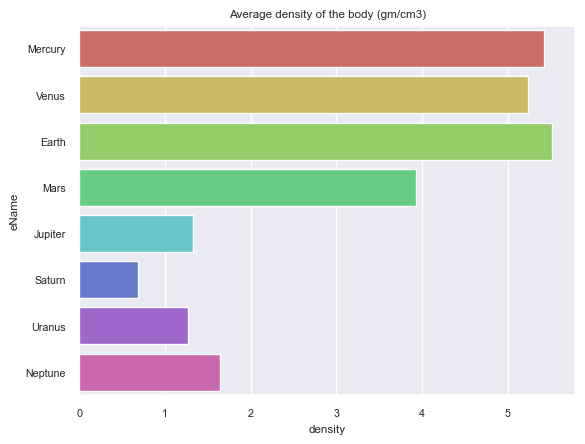

In [211]:
# Lets look the average density of the body

sns.barplot(data=planets, x='density', y='eName', ci="sd", palette="hls").set(title='Average density of the body (gm/cm3)');

Density is defined as the ratio of the mass of an object to the volume of space the object takes up. Mathematically, we would say D = M/V. Density will determine if you sink or float when put into a liquid, like water.

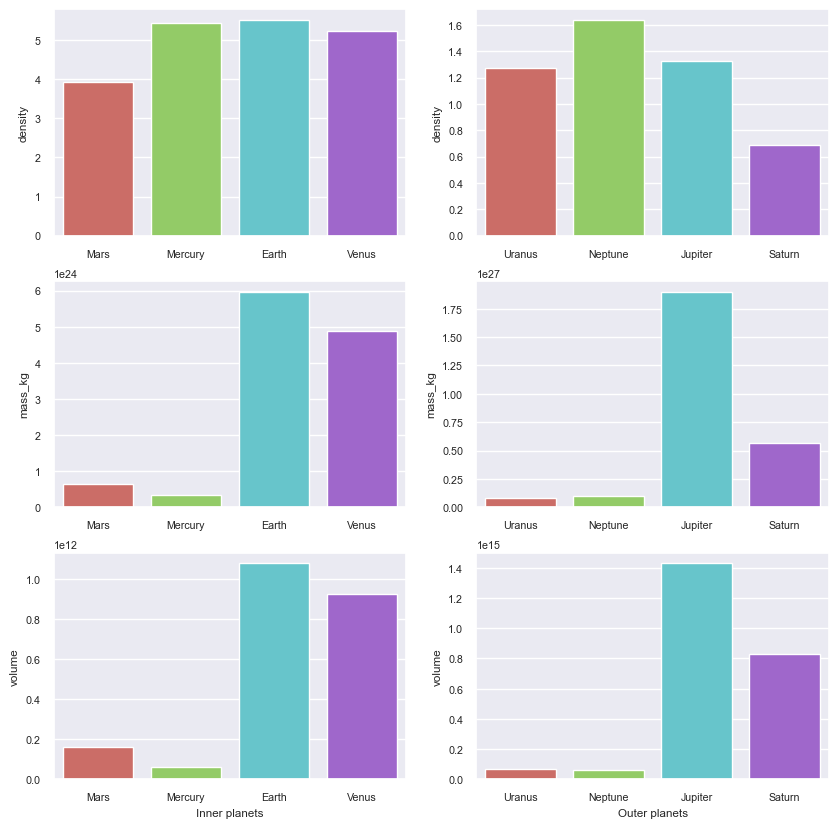

In [215]:
# Lets look approxima loote volume in km^3, total estimated mass of object in kg and the average density of the body

f, ax = plt.subplots(3, 2, figsize=(10, 10))

sns.barplot(data=inner_planets, x='eName', y='density', palette="hls", ax=ax[0,0])
sns.barplot(data=outer_planets, x='eName', y='density', palette="hls", ax=ax[0,1])
sns.barplot(data=inner_planets, x='eName', y='mass_kg', palette="hls", ax=ax[1,0])
sns.barplot(data=outer_planets, x='eName', y='mass_kg', palette="hls", ax=ax[1,1])
sns.barplot(data=inner_planets, x='eName', y='volume', palette="hls", ax=ax[2,0])
sns.barplot(data=outer_planets, x='eName', y='volume', palette="hls", ax=ax[2,1])

ax[2,0].set_xlabel('Inner planets')
ax[2,1].set_xlabel('Outer planets')
ax[1,0].set_xlabel(None)
ax[1,1].set_xlabel(None)
ax[0,0].set_xlabel(None)
ax[0,1].set_xlabel(None);